<a href="https://colab.research.google.com/github/FukudaBQ/Game2/blob/master/linearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSE 5522 Lab1
Jiankai Xu


Part 1:  Linear Regression for Gene Expression Prediction (40 points)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL)
# remove row names from the frist column, rows=samples, cols=miR features
miR = np.array(miR_df)[:,1:-1]
print (miR.shape)
mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL)
# remove label column, transpose with rows=samples, cols=mRNA
#mRNA_well = np.transpose(np.array(mRNA_well_df)[:,1:8896])
mRNA_well = np.transpose(np.array(mRNA_well_df)[:,1:8896])

print (mRNA_well.shape)
mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_poor = np.transpose(np.array(mRNA_poor_df)[:,1:8896])
print (mRNA_poor.shape)
tissue_types_URL = 'https://github.com/efosler/cse5522data/raw/master/cancerType-x-Categorical.csv'
tissue_types_df = pd.read_csv(tissue_types_URL)
tissue_types = np.array(tissue_types_df)[:,1]


(8895, 20)
(8895, 35)
(8895, 20)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# first, set up dataframe for all variables 

mRNA_traindata = []
mRNA_testdata = []
mRNA_totaltarget = []

mRNA_traintarget = []
mRNA_testtarget = []
# for good model

for i in range(35):
  question = []
  for j in range(8895):
    question.append(mRNA_well[j][i])
  mRNA_totaltarget.append(question)
print(len(mRNA_totaltarget))
# def train(miR,mRNA_totaltarget,size):
#   for k in range(size):
#     mRNA_traindata1, mRNA_testdata1, mRNA_traintarget1, mRNA_testtarget1 = train_test_split(miR,mRNA_totaltarget[k],test_size = 0.2)
#     mRNA_traindata.append(mRNA_traindata1)
#     mRNA_testdata.append(mRNA_testdata1)
#     mRNA_traintarget.append(mRNA_traintarget1)
#     mRNA_testtarget.append(mRNA_testtarget1)
#   return [mRNA_traindata, mRNA_testdata, mRNA_traintarget, mRNA_testtarget]

  
# for k in range(35):
#   mRNA_traindata1, mRNA_testdata1, mRNA_traintarget1, mRNA_testtarget1 = train_test_split(miR,mRNA_totaltarget[k],test_size = 0.2, random_state = 5)
#   mRNA_traindata.append(mRNA_traindata1)
#   mRNA_testdata.append(mRNA_testdata1)
#   mRNA_traintarget.append(mRNA_traintarget1)
#   mRNA_testtarget.append(mRNA_testtarget1)

# result = train(miR,mRNA_totaltarget,35)
# mRNA_traindata = result[0]
# mRNA_testdata = result[1]
# mRNA_traintarget = result[2]
# mRNA_testtarget = result[3]
  
# print (mRNA_traindata[0].shape)
# print (mRNA_testdata[0].shape)
# rmse = []
# r2 = []
# for i in range(35):
#   lin_model = LinearRegression()
#   lin_model.fit(mRNA_traindata[i],mRNA_traintarget[i])
#   train_testpredict=lin_model.predict(mRNA_testdata[i])
#   rmse_1 = (np.sqrt(mean_squared_error(mRNA_testtarget[i],train_testpredict)))
#   r2_1 = r2_score(mRNA_testtarget[i],train_testpredict)
#   rmse.append(rmse_1)
#   r2.append(r2_1)
#   print('Test RMSE = {}, Test R2 = {}'.format(rmse_1,r2_1))

# print('mean r2: ' , np.average(r2))
# print('standard deviation r2: ', np.std(r2))
# print('mean rmse: ' , np.average(rmse))
# print('standard deviation rmse: ', np.std(rmse))


35


In [ ]:
def train(miR,mRNA_totaltarget,size):
  for k in range(size):
    mRNA_traindata1, mRNA_testdata1, mRNA_traintarget1, mRNA_testtarget1 = train_test_split(miR,mRNA_totaltarget[k],test_size = 0.2)
    mRNA_traindata.append(mRNA_traindata1)
    mRNA_testdata.append(mRNA_testdata1)
    mRNA_traintarget.append(mRNA_traintarget1)
    mRNA_testtarget.append(mRNA_testtarget1)
  return [mRNA_traindata, mRNA_testdata, mRNA_traintarget, mRNA_testtarget]

For poor model

In [ ]:
mRNA_totaltarget_poor = []
for i in range(20):
  question = []
  for j in range(8895):
    question.append(mRNA_poor[j][i])
  mRNA_totaltarget_poor.append(question)
print (len(mRNA_totaltarget_poor[0]))
# clear_all(mRNA_traindata,mRNA_testdata,mRNA_traintarget,mRNA_traintarget)
# mRNA_traindata = []
# mRNA_testdata = []
# mRNA_traintarget = []
# mRNA_testtarget = []
# retult1 = []
# resultp = train(miR,mRNA_totaltarget_poor,20)

# print(len(mRNA_totaltarget_poor[0]))
# # result1.append(resultp)
# # resultp = train(miR,mRNA_totaltarget_poor,20)
# # result1.append(resultq)
# mRNA_traindata = resultp[0]
# mRNA_testdata = resultp[1]
# mRNA_traintarget = resultp[2]
# mRNA_testtarget = resultp[3]
# print (mRNA_traindata[0].shape)
# print (mRNA_testdata[0].shape)
# rmse_p = []
# r2_p = []
# for i in range(20):
#   lin_model = LinearRegression()
#   lin_model.fit(mRNA_traindata[i],mRNA_traintarget[i])
#   train_testpredict=lin_model.predict(mRNA_testdata[i])
#   rmse_1 = (np.sqrt(mean_squared_error(mRNA_testtarget[i],train_testpredict)))
#   r2_1 = r2_score(mRNA_testtarget[i],train_testpredict)
#   rmse_p.append(rmse_1)
#   r2_p.append(r2_1)
#   print('Test RMSE = {}, Test R2 = {}'.format(rmse_1,r2_1))

# print('mean r2: ' , np.average(r2_p))
# print('standard deviation r2: ', np.std(r2_p))
# print('mean rmse: ' , np.average(rmse_p))
# print('standard deviation rmse: ', np.std(rmse_p))

8895


repeat the test for 10 times

In [ ]:
# mRNA_traindata = []
# mRNA_testdata = []
# mRNA_traintarget = []
# mRNA_testtarget = []
# result = []

# for i in range(10):
#   result.append(train(miR,mRNA_totaltarget,35))
#   mRNA_traindata.append(result[i][0])
#   mRNA_testdata.append(result[i][1])
#   mRNA_traintarget.append(result[i][2])
#   mRNA_testtarget.append(result[i][3])
# print (len(mRNA_traindata[0])) 
# rmse = []
# r2 = []
# for i in range(35):
#   lin_model = LinearRegression()
#   lin_model.fit(mRNA_traindata[i],mRNA_traintarget[i])
#   train_testpredict=lin_model.predict(mRNA_testdata[i])
#   rmse_1 = (np.sqrt(mean_squared_error(mRNA_testtarget[i],train_testpredict)))
#   r2_1 = r2_score(mRNA_testtarget[i],train_testpredict)
#   rmse.append(rmse_1)
#   r2.append(r2_1)
#   print('Test RMSE = {}, Test R2 = {}'.format(rmse_1,r2_1))  
  
# print('mean r2: ' , np.average(r2))
# print('standard deviation r2: ', np.std(r2))
# print('mean rmse: ' , np.average(rmse))
# print('standard deviation rmse: ', np.std(rmse))

In [ ]:
mRNA_traindata = []
mRNA_testdata = []
mRNA_traintarget = []
mRNA_testtarget = []
result = []

for i in range(10):
  result = train(miR,mRNA_totaltarget,35)
  mRNA_traindata.extend(result[0])
  mRNA_testdata.extend(result[1])
  mRNA_traintarget.extend(result[2])
  mRNA_testtarget.extend(result[3])
print(len(mRNA_traindata))
rmse = []
r2 = []
for i in range(1000):
  lin_model = LinearRegression()
  lin_model.fit(mRNA_traindata[i],mRNA_traintarget[i])
  train_testpredict=lin_model.predict(mRNA_testdata[i])
  rmse_1 = (np.sqrt(mean_squared_error(mRNA_testtarget[i],train_testpredict)))
  r2_1 = r2_score(mRNA_testtarget[i],train_testpredict)
  rmse.append(rmse_1)
  r2.append(r2_1)
  #print('Test RMSE = {}, Test R2 = {}'.format(rmse_1,r2_1))  
  
print('mean r2: ' , np.average(r2))
print('standard deviation r2: ', np.std(r2))
print('mean rmse: ' , np.average(rmse))
print('standard deviation rmse: ', np.std(rmse))

71610
mean r2:  0.8300069942291157
standard deviation r2:  0.03851841376214423
mean rmse:  0.9573073964523676
standard deviation rmse:  0.3144496662325109


repeat 10 times for the poor one

In [ ]:
mRNA_totaltarget_poor = []
for i in range(20):
  question = []
  for j in range(8895):
    question.append(mRNA_poor[j][i])
  mRNA_totaltarget_poor.append(question)
mRNA_traindata1 = []
mRNA_testdata1 = []
mRNA_traintarget1 = []
mRNA_testtarget1 = []
print(len(mRNA_traindata1))
for i in range(10):
  resultp = train(miR,mRNA_totaltarget_poor,20)
  mRNA_traindata1.extend(resultp[0])
  mRNA_testdata1.extend(resultp[1])
  mRNA_traintarget1.extend(resultp[2])
  mRNA_testtarget1.extend(resultp[3])
print(len(mRNA_traindata1))
rmse_p = []
r2_p = []
for i in range(1000):
  lin_model = LinearRegression()
  lin_model.fit(mRNA_traindata1[i],mRNA_traintarget1[i])
  train_testpredict=lin_model.predict(mRNA_testdata1[i])
  rmse_1 = (np.sqrt(mean_squared_error(mRNA_testtarget1[i],train_testpredict)))
  r2_1 = r2_score(mRNA_testtarget1[i],train_testpredict)
  rmse_p.append(rmse_1)
  r2_p.append(r2_1)
  print('Test RMSE = {}, Test R2 = {}'.format(rmse_1,r2_1))

print('mean r2: ' , np.average(r2_p))
print('standard deviation r2: ', np.std(r2_p))
print('mean rmse: ' , np.average(rmse_p))
print('standard deviation rmse: ', np.std(rmse_p))

2.  Visualize and compare the performance of the well expressed gene set to the poorly expressed gene set using R2.  Draw histograms of the R2s for both sets on the same plot; one histogram comparison should be done for train and one for test. 

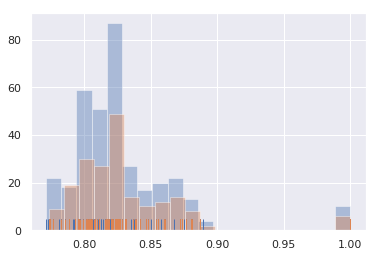

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(r2, bins=20, kde=False, rug=True, label='well');
sns.distplot(r2_p, bins=20, kde=False, rug=True, label='poor');



3. In this part, we want to add a categorical feature as the 22nd predictor. Tissue type is an important factor in explaining the gene expression profile. Our samples come from 32 tissue types which are provided to you in a separate file. Use dummy variable coding to include the tissue type in your regression.  

In [ ]:
tissue_types_u = np.unique(tissue_types)
attr = []
print(len(tissue_types_u))
for i in range(8895):
  for j in range(33):
    mark = [0]*32
    if tissue_types[i] == tissue_types_u[j]:
      mark[j] = 1
      break
  attr.extend(mark)
print(len(attr))
att = np.array(attr)
att = att.reshape((8895,32))
print(miR.shape)
print(att.shape)
miR_a = np.concatenate((miR,att),axis = 1)
print(len(miR_a[0]))



32
284640
(8895, 20)
(8895, 32)
52


In [ ]:
mRNA_traindata_a = []
mRNA_testdata_a = []
mRNA_traintarget_a = []
mRNA_testtarget_a = []
result_a = []

for i in range(10):
  result = train(miR_a,mRNA_totaltarget,35)
  mRNA_traindata_a.extend(result[0])
  mRNA_testdata_a.extend(result[1])
  mRNA_traintarget_a.extend(result[2])
  mRNA_testtarget_a.extend(result[3])

rmse_a = []
r2_a = []
for i in range(35):
  lin_model = LinearRegression()
  lin_model.fit(mRNA_traindata_a[i],mRNA_traintarget_a[i])
  train_testpredict=lin_model.predict(mRNA_testdata_a[i])
  rmse_1 = (np.sqrt(mean_squared_error(mRNA_testtarget_a[i],train_testpredict)))
  r2_1 = r2_score(mRNA_testtarget_a[i],train_testpredict)
  rmse_a.append(rmse_1)
  r2_a.append(r2_1)
  print(i,',Test RMSE = {}, Test R2 = {}'.format(rmse_1,r2_1))  
  
print('mean r2: ' , np.average(r2_a))
print('standard deviation r2: ', np.std(r2_a))
print('mean rmse: ' , np.average(rmse_a))
print('standard deviation rmse: ', np.std(rmse_a))

0 ,Test RMSE = 0.0, Test R2 = 1.0
1 ,Test RMSE = 1.0743401450848507, Test R2 = 0.8804551190440197
2 ,Test RMSE = 0.7810562001625184, Test R2 = 0.8738350454592196
3 ,Test RMSE = 1.1985716435902656, Test R2 = 0.8735825389139802
4 ,Test RMSE = 0.8499394896925603, Test R2 = 0.8600143183355478
5 ,Test RMSE = 1.154664188859454, Test R2 = 0.8718661549199189
6 ,Test RMSE = 1.1833111765051034, Test R2 = 0.8552870762027345
7 ,Test RMSE = 1.2875332996162425, Test R2 = 0.8462067998556831
8 ,Test RMSE = 0.7687266848767651, Test R2 = 0.8251518149893017
9 ,Test RMSE = 1.2921313945852266, Test R2 = 0.8261099591290159
10 ,Test RMSE = 1.306749253039538, Test R2 = 0.8303559565167176
11 ,Test RMSE = 1.0025850658726554, Test R2 = 0.8312745249853897
12 ,Test RMSE = 1.4127487160741716, Test R2 = 0.8168690887219051
13 ,Test RMSE = 0.8631497242415309, Test R2 = 0.8229657181319564
14 ,Test RMSE = 1.179117384262309, Test R2 = 0.8182983934203973
15 ,Test RMSE = 0.9935077295737648, Test R2 = 0.8203857478528345
16 